In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [88]:
data = pd.read_csv("Admission_Predict.csv")

In [89]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [90]:
data.shape

(400, 9)

In [91]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [92]:
data.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [93]:
data[data.isnull().any(axis=1)]

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit


In [94]:
data[(data==0).any(axis=1)]

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
4,5,314,103,2,2.0,3.0,8.21,0,0.65
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45
15,16,314,105,3,3.5,2.5,8.30,0,0.54
...,...,...,...,...,...,...,...,...,...
388,389,296,97,2,1.5,2.0,7.80,0,0.49
390,391,314,102,2,2.0,2.5,8.24,0,0.64
391,392,318,106,3,2.0,3.0,8.65,0,0.71
393,394,317,104,2,3.0,3.0,8.76,0,0.77


In [95]:
data.mean(numeric_only=True)

Serial No.           200.500000
GRE Score            316.807500
TOEFL Score          107.410000
University Rating      3.087500
SOP                    3.400000
LOR                    3.452500
CGPA                   8.598925
Research               0.547500
Chance of Admit        0.724350
dtype: float64

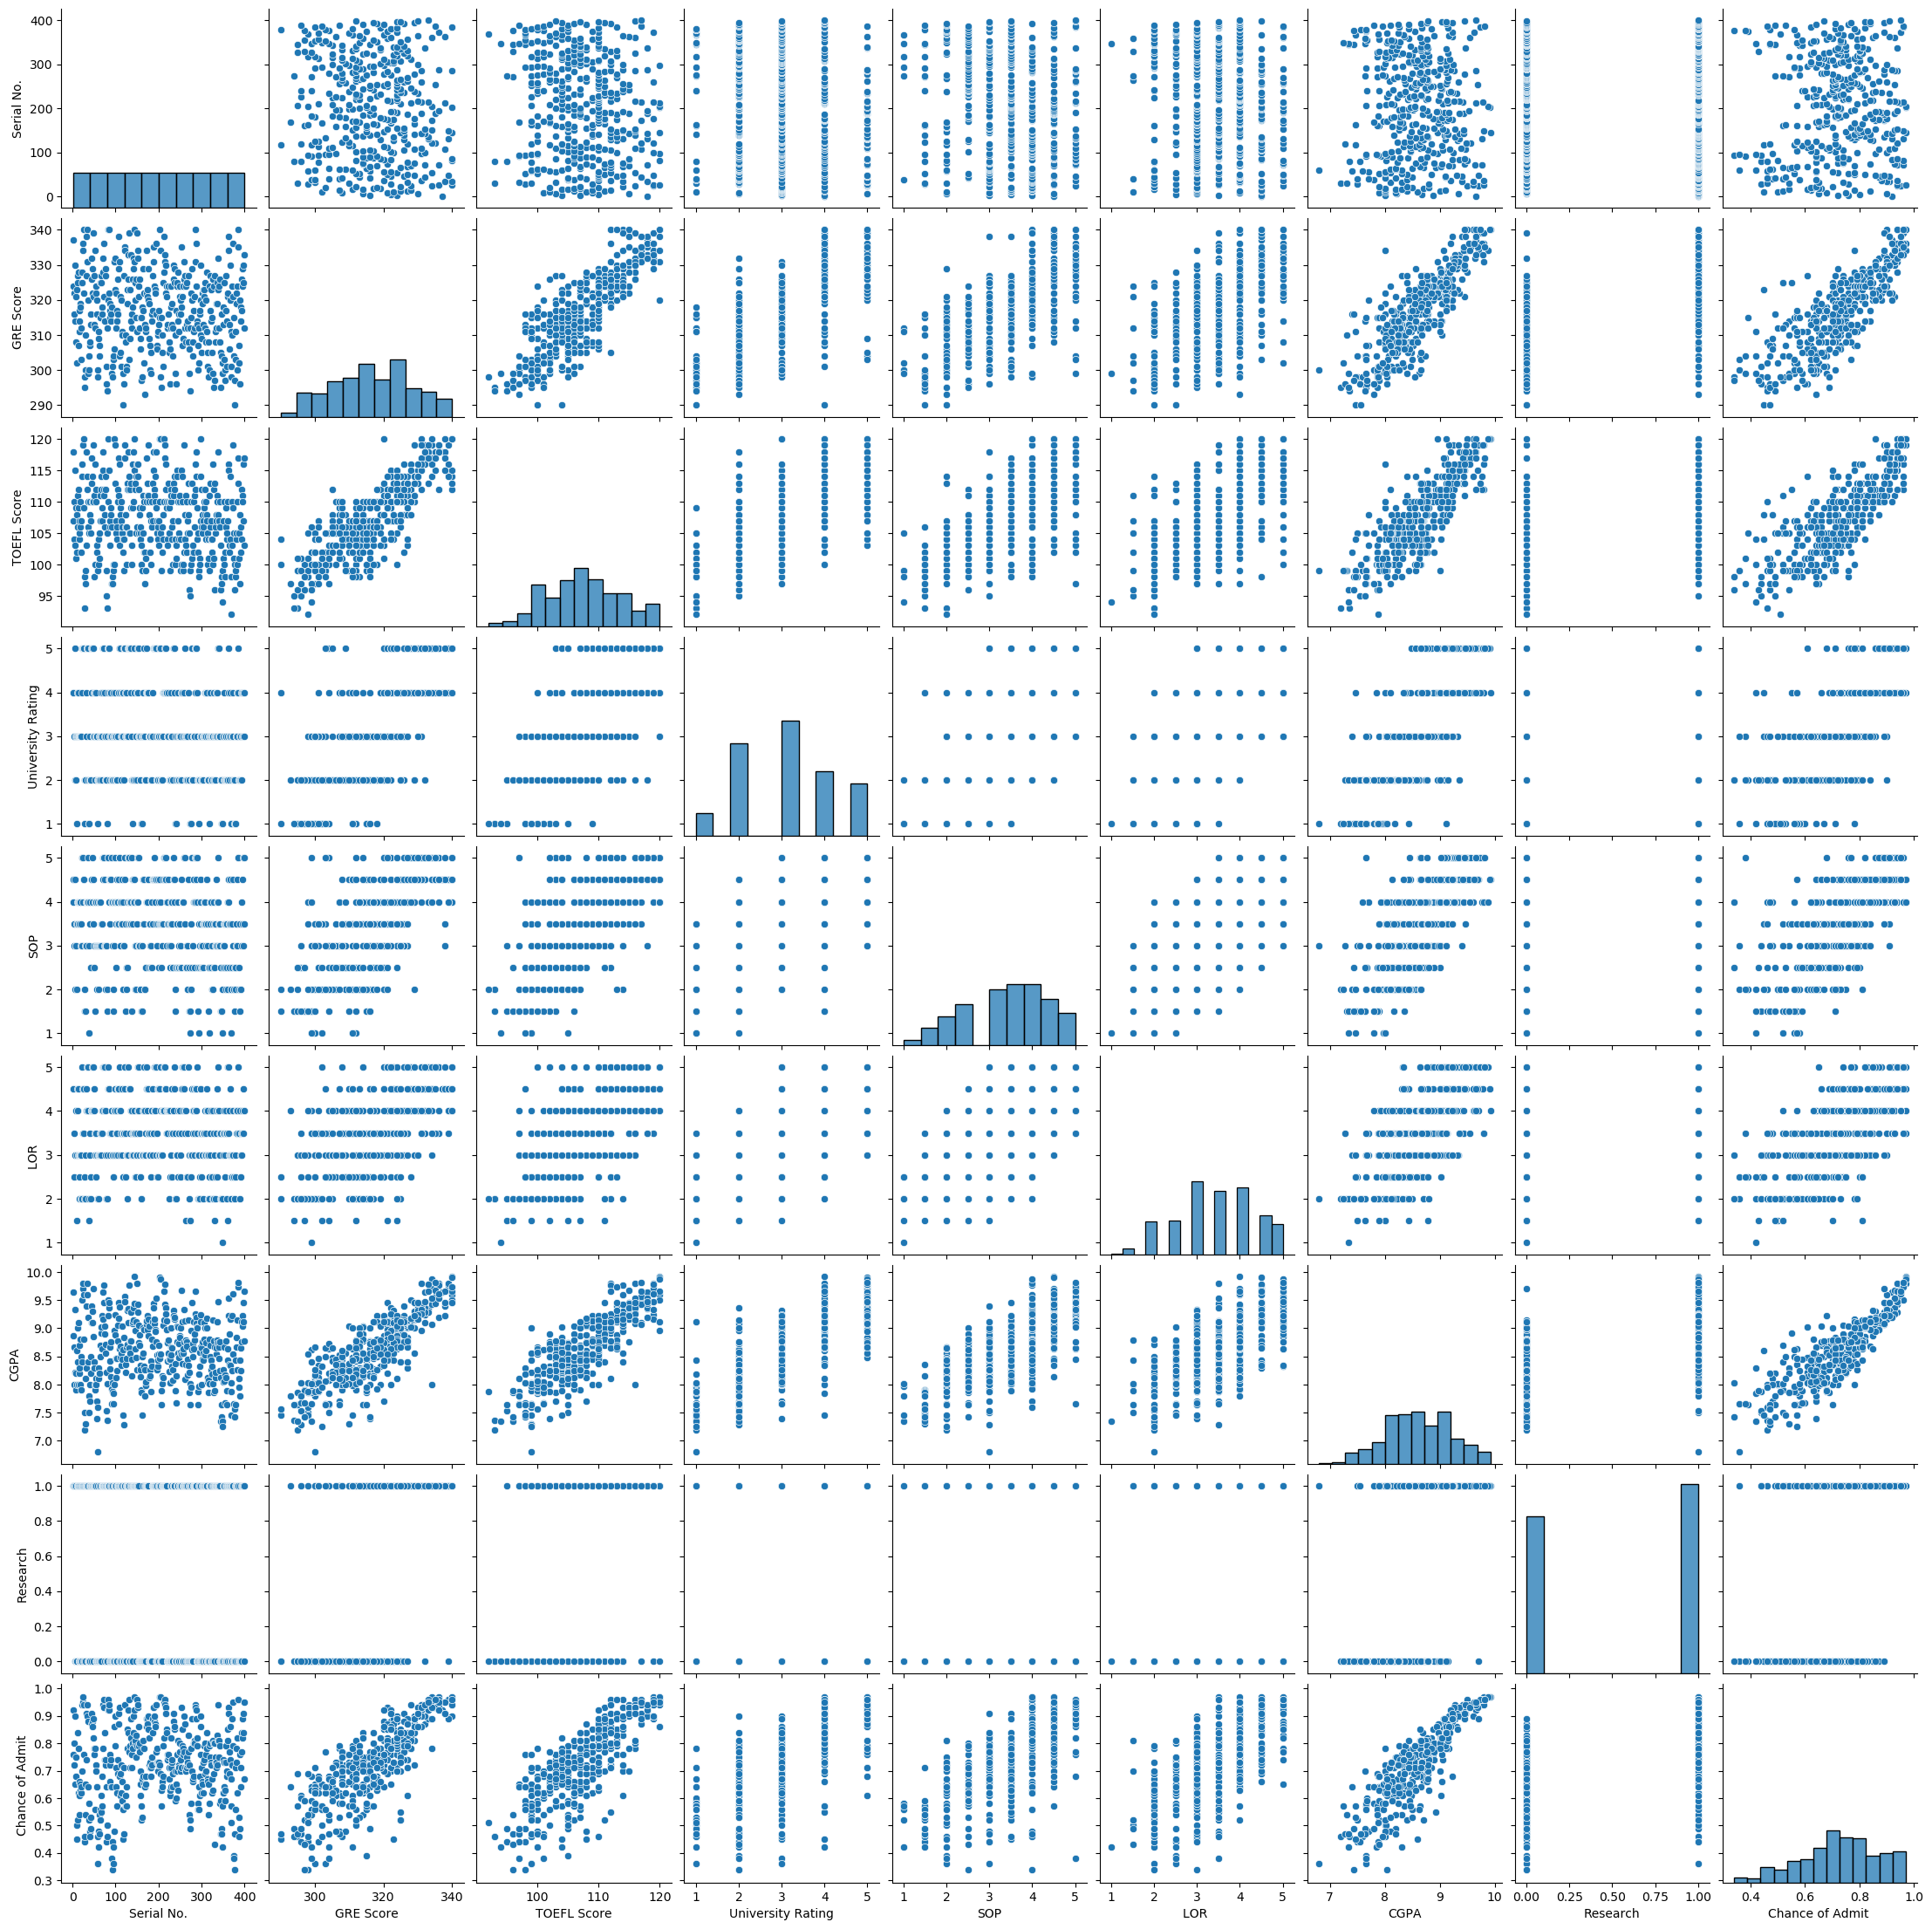

In [96]:
sns.pairplot(data)

In [97]:
data[:100]

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
95,96,304,100,4,1.5,2.5,7.84,0,0.42
96,97,306,100,2,3.0,3.0,8.00,0,0.48
97,98,331,120,3,4.0,4.0,8.96,1,0.86
98,99,332,119,4,5.0,4.5,9.24,1,0.90


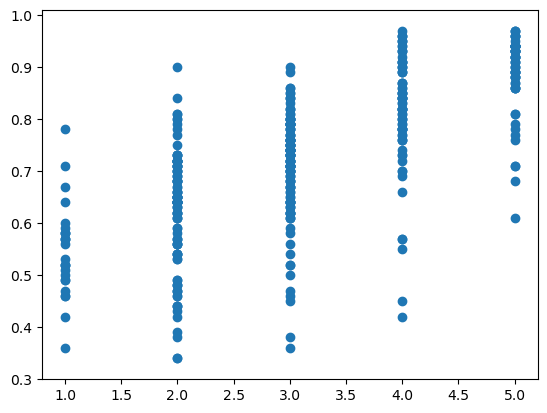

In [98]:
plt.scatter(data['University Rating'] , data['Chance of Admit '])

(array([ 1.,  8., 24., 45., 64., 80., 60., 67., 31., 20.]),
 array([6.8  , 7.112, 7.424, 7.736, 8.048, 8.36 , 8.672, 8.984, 9.296,
        9.608, 9.92 ]),
 <a list of 10 Patch objects>)

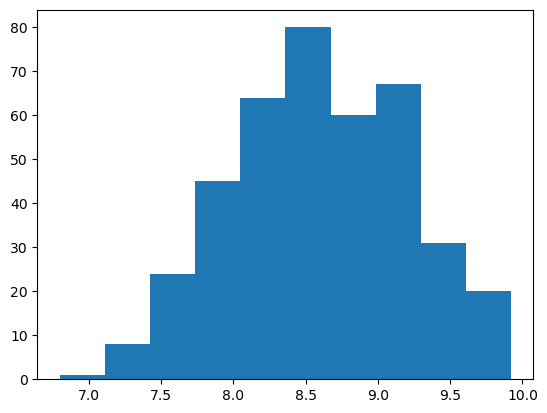

In [99]:
plt.hist(data['CGPA'])

In [100]:
data.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [101]:
data["Chance of Admit "].mask(data['Chance of Admit '] >0.85, 1, inplace=True)
data["Chance of Admit "].mask(data['Chance of Admit '] <0.85, 0, inplace=True)

In [102]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1.0
1,2,324,107,4,4.0,4.5,8.87,1,0.0
2,3,316,104,3,3.0,3.5,8.00,1,0.0
3,4,322,110,3,3.5,2.5,8.67,1,0.0
4,5,314,103,2,2.0,3.0,8.21,0,0.0


In [103]:
convert_dict = {'Chance of Admit ': int}
data = data.astype(convert_dict)

In [104]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1
1,2,324,107,4,4.0,4.5,8.87,1,0
2,3,316,104,3,3.0,3.5,8.00,1,0
3,4,322,110,3,3.5,2.5,8.67,1,0
4,5,314,103,2,2.0,3.0,8.21,0,0


<BarContainer object of 400 artists>

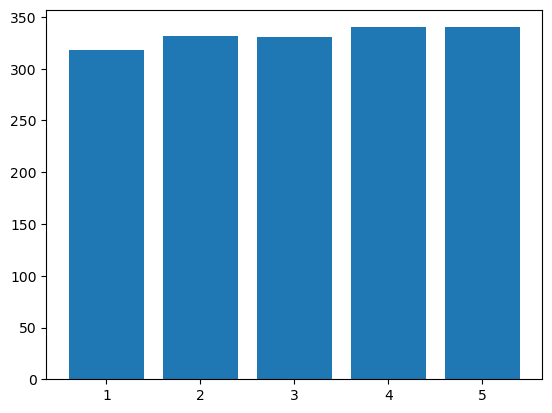

In [105]:
plt.bar(data['University Rating'] , data['GRE Score'])

<BarContainer object of 400 artists>

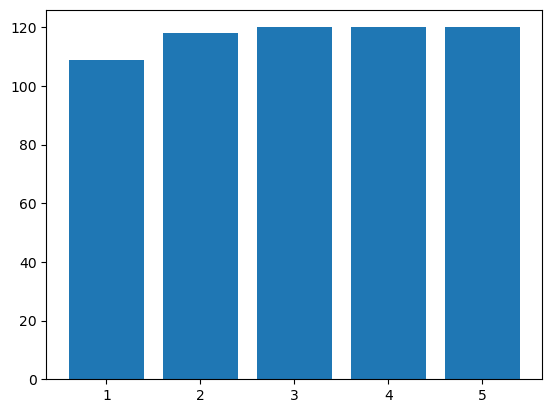

In [106]:
plt.bar(data['University Rating'] , data['TOEFL Score'])

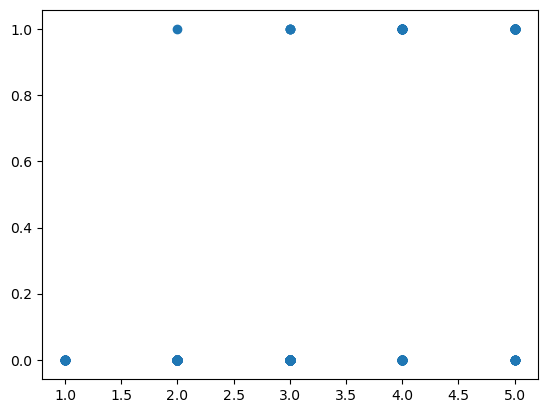

In [107]:
plt.scatter(data['University Rating'] , data['Chance of Admit '])

In [108]:
Features = data.drop(columns=['Chance of Admit '] , axis=1)

In [109]:
Labels = data['Chance of Admit ']

In [111]:
len(Features) , len(Labels)

(400, 400)

In [50]:
Feature_train , Feature_test , Label_train , Label_test = train_test_split(Features , Labels , test_size=0.2)

In [114]:
len(Feature_train) , len(Feature_test) , len(Label_train) , len(Label_test)

(320, 80, 320, 80)

In [115]:
Feature_train

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
345,346,316,98,1,1.5,2.0,7.43,0
123,124,308,108,3,3.5,3.5,8.22,0
37,38,300,105,1,1.0,2.0,7.80,0
110,111,305,108,5,3.0,3.0,8.48,0
356,357,327,109,3,3.5,4.0,8.77,1
...,...,...,...,...,...,...,...,...
7,8,308,101,2,3.0,4.0,7.90,0
332,333,308,106,3,3.5,2.5,8.21,1
324,325,315,104,3,3.0,2.5,8.33,0
35,36,320,110,5,5.0,5.0,9.20,1


In [116]:
Feature_test

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
280,281,311,102,3,4.5,4.0,8.64,1
339,340,324,107,5,3.5,4.0,8.66,1
197,198,310,106,2,3.5,2.5,8.33,0
164,165,329,111,4,4.5,4.0,9.01,1
102,103,314,106,2,4.0,3.5,8.25,0
...,...,...,...,...,...,...,...,...
229,230,324,111,4,3.0,3.0,9.01,1
157,158,309,104,2,2.0,2.5,8.26,0
150,151,334,114,4,4.0,4.0,9.43,1
162,163,318,109,3,3.0,3.0,8.50,0


In [117]:
Label_train

345    0
123    0
37     0
110    0
356    0
      ..
7      0
332    0
324    0
35     1
145    0
Name: Chance of Admit , Length: 320, dtype: int64

In [118]:
Label_test

280    0
339    0
197    0
164    0
102    0
      ..
229    0
157    0
150    1
162    0
129    1
Name: Chance of Admit , Length: 80, dtype: int64

In [147]:
from sklearn import tree

In [148]:
model = tree.DecisionTreeClassifier()

In [149]:
model.fit(Feature_train , Label_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(248.0, 346.49999999999994, 'X[6] <= 9.155\ngini = 0.324\nsamples = 320\nvalue = [255, 65]'),
 Text(137.77777777777777, 300.29999999999995, 'X[2] <= 116.5\ngini = 0.081\nsamples = 261\nvalue = [250, 11]'),
 Text(110.22222222222223, 254.09999999999997, 'X[6] <= 8.93\ngini = 0.053\nsamples = 257\nvalue = [250, 7]'),
 Text(82.66666666666667, 207.89999999999998, 'gini = 0.0\nsamples = 221\nvalue = [221, 0]'),
 Text(137.77777777777777, 207.89999999999998, 'X[3] <= 4.5\ngini = 0.313\nsamples = 36\nvalue = [29, 7]'),
 Text(82.66666666666667, 161.7, 'X[0] <= 198.5\ngini = 0.175\nsamples = 31\nvalue = [28, 3]'),
 Text(55.111111111111114, 115.5, 'X[0] <= 160.5\ngini = 0.355\nsamples = 13\nvalue = [10, 3]'),
 Text(27.555555555555557, 69.30000000000001, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(82.66666666666667, 69.30000000000001, 'X[7] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(55.111111111111114, 23.100000000000023, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(

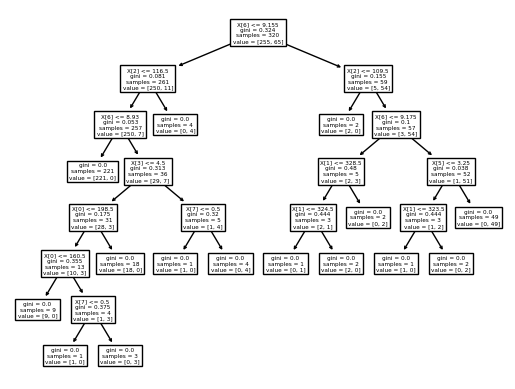

In [150]:
tree.plot_tree(model)

preds = model.predict(Feature_test)

In [151]:
preds = model.predict(Feature_test)

In [152]:
preds

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1])

In [153]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [154]:
confusion_matrix(Label_test, preds)

array([[61,  1],
       [ 0, 18]])

In [155]:
test_accuracy = accuracy_score(Label_test, preds)
test_accuracy

0.9875

In [156]:
preds2 = model.predict(Feature_train)

In [157]:
confusion_matrix(Label_train, preds2)

array([[255,   0],
       [  0,  65]])

In [158]:
train_accuracy = accuracy_score(Label_train, preds2)
train_accuracy

1.0

In [159]:
import numpy as np

In [160]:
row = np.array([281 , 311 , 102 , 3  , 4.5 , 4.0  , 8.64  , 1])
row2 = row.reshape(1 , -1)
preds3 = model.predict(row2)

In [168]:
result = data[data['Serial No.'] == 281]
result

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
280,281,311,102,3,4.5,4.0,8.64,1,0


In [161]:
preds3.dtype

dtype('int64')

In [162]:
preds3 == 0

array([ True])

In [163]:
def decode(preds):
    if(preds == 0):
        return 'Not Admitted'

    else:
        return 'Admitted'

In [164]:
decode(preds3)

'Not Admitted'

In [165]:
row = np.array([1 , 337 , 118 , 4 , 4.5 , 4.5 , 9.65 , 1])
row2 = row.reshape(1 , -1)
preds3 = model.predict(row2)

In [169]:
result = data[data['Serial No.'] == 1]
result

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1


In [166]:
decode(preds3)

'Admitted'

In [170]:
model2 = tree.DecisionTreeClassifier(criterion = 'entropy')

In [171]:
model2.fit(Feature_train , Label_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [172]:
preds = model.predict(Feature_test)

In [173]:
preds

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1])

In [174]:
confusion_matrix(Label_test, preds)

array([[61,  1],
       [ 0, 18]])

In [175]:
test_accuracy = accuracy_score(Label_test, preds)
test_accuracy

0.9875

In [176]:
preds2 = model.predict(Feature_train)

In [177]:
preds2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,

In [178]:
confusion_matrix(Label_train, preds2)

array([[255,   0],
       [  0,  65]])

In [179]:
train_accuracy = accuracy_score(Label_train, preds2)
train_accuracy

1.0

In [180]:
row = np.array([281 , 311 , 102 , 3  , 4.5 , 4.0  , 8.64  , 1])
row2 = row.reshape(1 , -1)
preds3 = model.predict(row2)

In [181]:
decode(preds3)

'Not Admitted'

In [182]:
row = np.array([1 , 337 , 118 , 4 , 4.5 , 4.5 , 9.65 , 1])
row2 = row.reshape(1 , -1)
preds3 = model.predict(row2)

In [183]:
decode(preds3)

'Admitted'